In [24]:
from pathlib import Path
import pandas as pd

LVM_ROOT = r"E:\Speciale - Results\Final-LabView-Trim-Testset"

df_rec = pd.read_parquet(r"E:\Speciale - Results\df_rec.parquet")

df_rec["lvm_file"] = df_rec["recording_uid"].apply(
    lambda uid: Path(LVM_ROOT) / f"{uid}.lvm"
    if (Path(LVM_ROOT) / f"{uid}.lvm").exists()
    else None
)

df_rec_with_lvm = df_rec[df_rec["lvm_file"].notnull()]


In [2]:
patients = [1, 5, 29]
df_index = df_rec_with_lvm[df_rec_with_lvm["patient_id"].isin(patients)].copy()
df_index


,recording_uid,patient_id,enrollment_id,recording_id,tdms_path,annotation_path,fs,n_samples,recording_start,recording_end,rec_duration_s,lvm_file
0,P01_R01,1,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,97861504,2016-02-22 11:04:14,2016-02-24 16:09:49.750000,191135.750000,E:\Speciale - Results\Final-LabView-Trim-Tests...
1,P01_R02,1,None,2,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,75110401,2016-02-24 16:15:00,2016-02-26 09:00:00.001953,146700.001953,E:\Speciale - Results\Final-LabView-Trim-Tests...
6,P05_R01,5,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,82460288,2016-10-12 11:05:02,2016-10-14 07:49:17.250000,161055.250000,E:\Speciale - Results\Final-LabView-Trim-Tests...
49,P29_R01,29,None,1,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,512.0,131046656,2018-08-13 11:13:33,2018-08-16 10:19:23.500000,255950.500000,E:\Speciale - Results\Final-LabView-Trim-Tests...


In [3]:
methods = ["neurokit", "pantompkins1985", "hamilton2002"]
methods_extra = ["neurokit", "biosppy", "pantompkins1985", "hamilton2002", "elgendi2010", "engzeemod2012", 'vg']

RR/peak comparison: 100%|██████████| 21/21 [06:47<00:00, 19.42s/it]


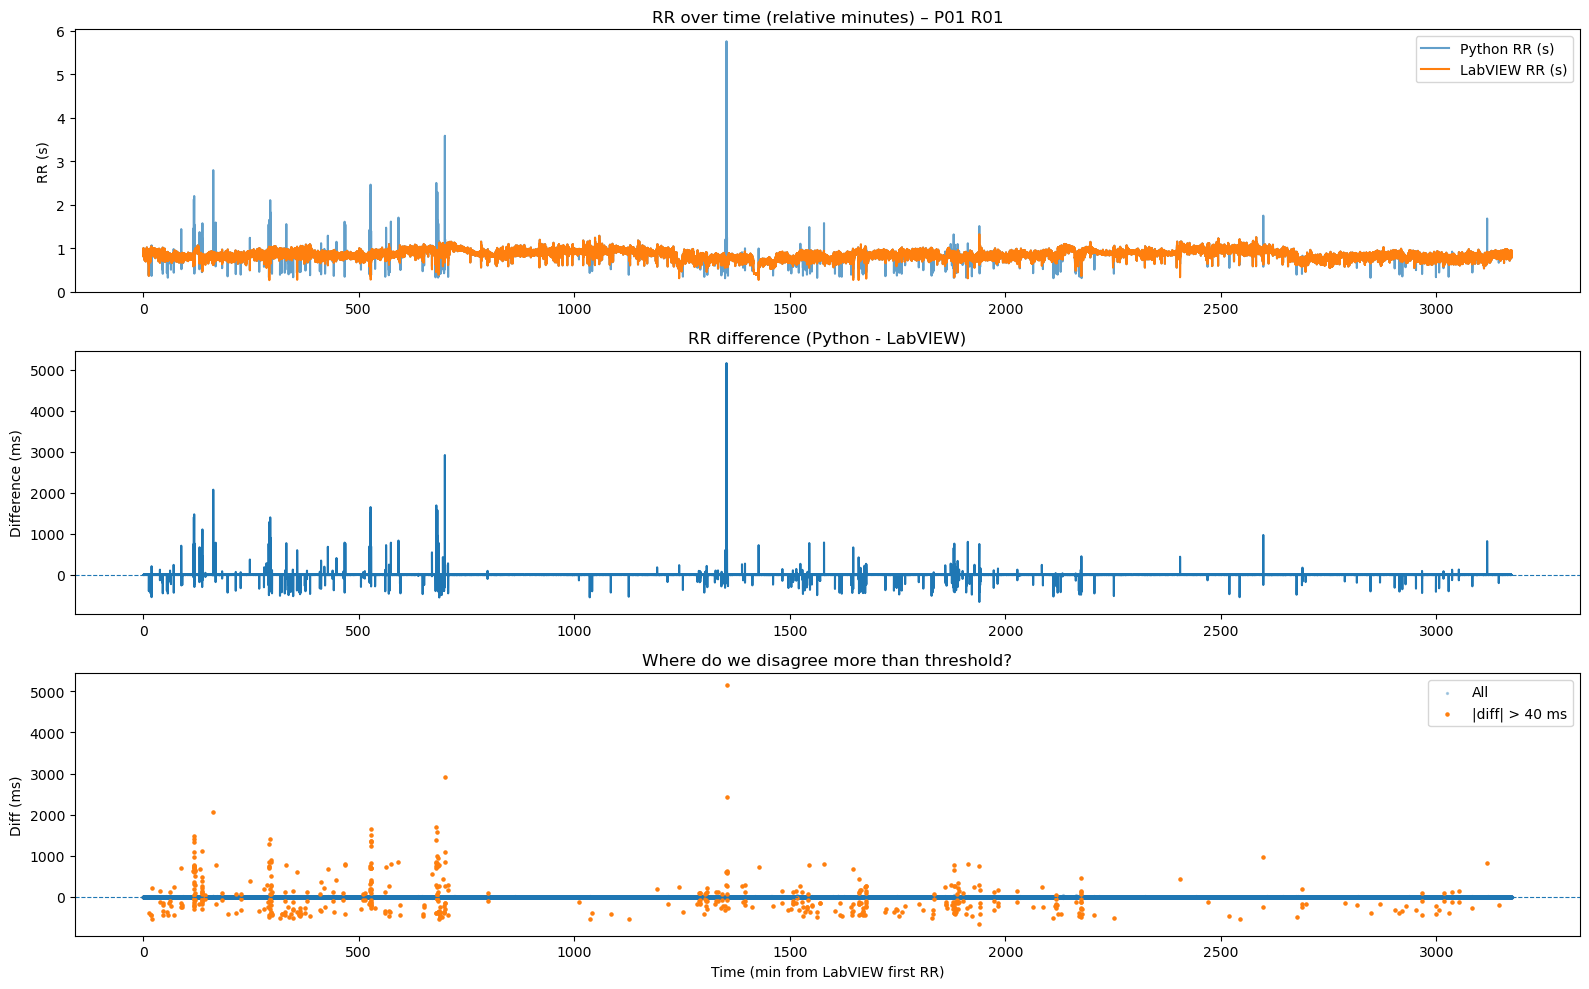

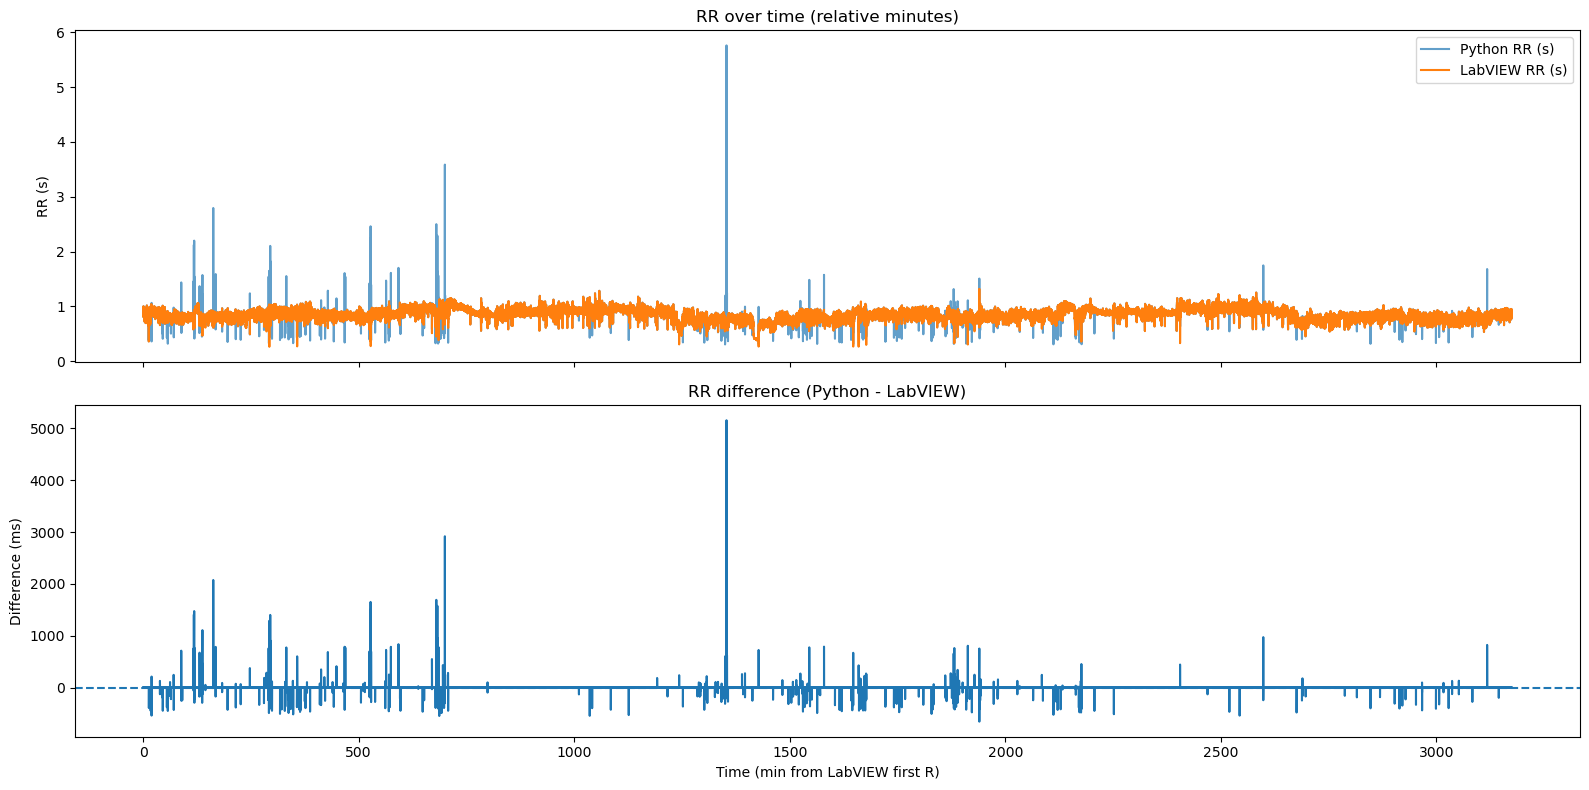

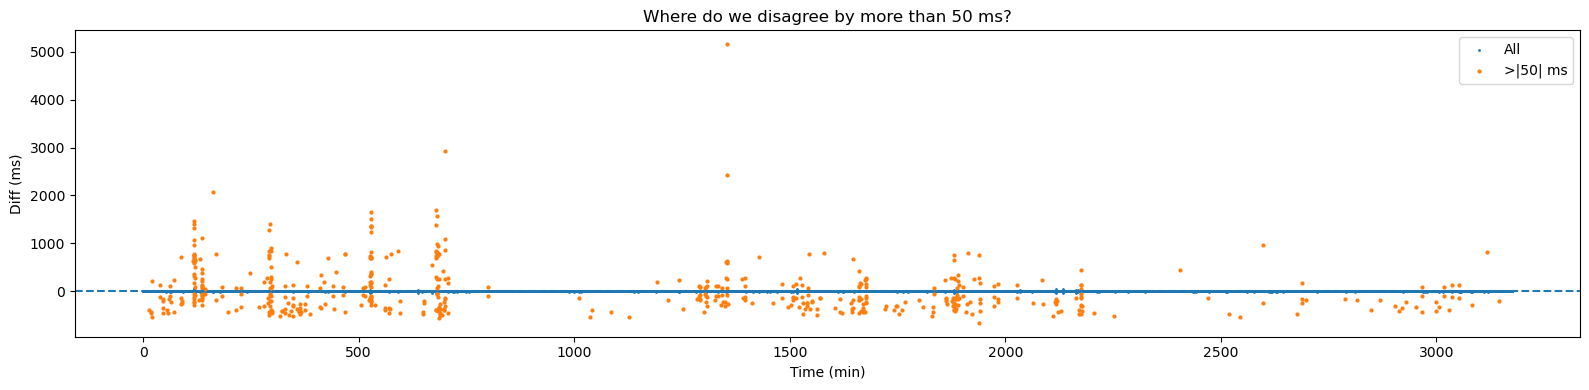

min RR_py (s) = 0.302734375
max RR_py (s) = 13.02734375
RR_py > 10 s: 1
largest 10 RR_py (s): [ 3.90429688  4.25976562  4.33984375  4.40039062  5.45507812  5.70117188
  5.75976562  6.19921875  7.20703125 13.02734375]
0.306640625 5.759765625
0    0.861328
1    0.871094
2    0.859375
3    0.865234
4    0.849609
Name: RR_python_s, dtype: float64


RR/peak comparison: 100%|██████████| 12/12 [05:20<00:00, 26.67s/it]


,n_common,rr_mae_ms,rr_rmse_ms,rr_corr,mean_hr_ref_bpm,mean_hr_test_bpm,mean_hr_diff_bpm,patient_id,recording_id,algo_id,...,raw_tdms_path,raw_lvm_path,n_peaks_labview_total,n_peaks_python_total,n_peaks_tp,n_peaks_fp,n_peaks_fn,peak_sens,peak_ppv,peak_f1
0,226526,2.022334,25.807871,0.968365,71.356255,71.349465,-0.006790,1,1,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,226869,227278,226445,407,424,0.998131,0.998206,0.998168
1,53696,43.244543,1865.566087,0.027800,81.810770,80.567938,-1.242832,1,1,pantompkins1985,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,226869,203740,13597,189771,213272,0.059933,0.066859,0.063207
2,189718,19.472615,165.399304,0.433911,70.017463,69.971936,-0.045527,1,1,hamilton2002,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,226869,217656,74276,143011,152593,0.327396,0.341834,0.334459
3,167612,1.626953,13.826275,0.990152,68.878174,68.888089,0.009915,1,2,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,167720,168576,167584,173,136,0.999189,0.998969,0.999079
4,73756,21.908126,104.188776,0.425915,63.534060,63.298159,-0.235901,1,2,pantompkins1985,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,167720,151775,9607,141788,156563,0.057814,0.063457,0.060504


In [4]:
from pathlib import Path
from Study3_R_peak_val import run_rr_comparison_from_df  # tilpas import-sti

aligned_dir = Path(r"E:\Speciale - Results\RR_alignment\aligned_rr_p01-05-29")

df_metrics = run_rr_comparison_from_df(
    df_index=df_index,
    methods=methods,
    aligned_dir=aligned_dir,
    patient_filter=patients,          # [1, 5, 29]
    delta_range_s=(-2.0, 2.0),
    delta_step_s=0.05,
    tol_s=0.15,
)

out_metrics_path = Path(r"E:\Speciale - Results\RR_alignment\rr_peak_metrics_p01-05-29.csv")
out_metrics_path.parent.mkdir(parents=True, exist_ok=True)
df_metrics.to_csv(out_metrics_path, index=False)
df_metrics.head()


In [16]:
df_metrics

,n_common,rr_mae_ms,rr_rmse_ms,rr_corr,mean_hr_ref_bpm,mean_hr_test_bpm,mean_hr_diff_bpm,patient_id,recording_id,algo_id,...,raw_tdms_path,raw_lvm_path,n_peaks_labview_total,n_peaks_python_total,n_peaks_tp,n_peaks_fp,n_peaks_fn,peak_sens,peak_ppv,peak_f1
0,226526,2.022334,25.807871,0.968365,71.356255,71.349465,-0.006790,1,1,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,226869,227278,226445,407,424,0.998131,0.998206,0.998168
1,53696,43.244543,1865.566087,0.027800,81.810770,80.567938,-1.242832,1,1,pantompkins1985,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,226869,203740,13597,189771,213272,0.059933,0.066859,0.063207
2,189718,19.472615,165.399304,0.433911,70.017463,69.971936,-0.045527,1,1,hamilton2002,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,226869,217656,74276,143011,152593,0.327396,0.341834,0.334459
3,167612,1.626953,13.826275,0.990152,68.878174,68.888089,0.009915,1,2,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,167720,168576,167584,173,136,0.999189,0.998969,0.999079
4,73756,21.908126,104.188776,0.425915,63.534060,63.298159,-0.235901,1,2,pantompkins1985,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,167720,151775,9607,141788,156563,0.057814,0.063457,0.060504
5,118220,18.675879,32.287766,0.871621,65.223326,65.321845,0.098519,1,2,hamilton2002,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,167720,163179,36056,126315,131664,0.214977,0.222059,0.218461
6,165982,1.723571,14.670238,0.994952,63.084296,63.099275,0.014979,5,1,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,166026,167188,4,166088,166022,0.000024,0.000024,0.000024
7,0,NaN,NaN,NaN,NaN,NaN,NaN,5,1,pantompkins1985,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,166026,77,0,0,166026,0.000000,NaN,NaN
8,0,NaN,NaN,NaN,NaN,NaN,NaN,5,1,hamilton2002,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,166026,89,0,0,166026,0.000000,NaN,NaN
9,348297,6.075896,83.469472,0.667793,85.285539,84.845285,-0.440254,29,1,neurokit,...,E:\ML algoritme tl anfaldsdetektion vha HRV\eP...,E:\Speciale - Results\Final-LabView-Trim-Tests...,351337,352357,347916,1117,3421,0.990263,0.996800,0.993521


In [5]:
cols_interest = [
    "patient_id", "recording_id", "algo_id",
    "peak_sens", "peak_ppv", "peak_f1",
    "rr_mae_ms", "rr_rmse_ms", "rr_corr",
    "n_peaks_labview_total", "n_peaks_python_total", "n_peaks_tp", "n_peaks_fp", "n_peaks_fn",
]

df_summary = df_metrics[cols_interest].copy()

# Evt. aggreger pr. patient+metode (hvis fx P1 har 2 recordings)
df_summary_patient = (
    df_summary
    .groupby(["patient_id", "algo_id"], as_index=False)
    .agg({
        "peak_sens": "mean",
        "peak_ppv": "mean",
        "peak_f1": "mean",
        "rr_mae_ms": "mean",
        "rr_rmse_ms": "mean",
        "rr_corr": "mean",
    })
)

df_summary_patient


,patient_id,algo_id,peak_sens,peak_ppv,peak_f1,rr_mae_ms,rr_rmse_ms,rr_corr
0,1,hamilton2002,0.271187,0.281946,0.276460,19.074247,98.843535,0.652766
1,1,neurokit,0.998660,0.998587,0.998624,1.824644,19.817073,0.979258
2,1,pantompkins1985,0.058874,0.065158,0.061856,32.576334,984.877432,0.226858
3,5,hamilton2002,0.000000,NaN,NaN,NaN,NaN,NaN
4,5,neurokit,0.000024,0.000024,0.000024,1.723571,14.670238,0.994952
5,5,pantompkins1985,0.000000,NaN,NaN,NaN,NaN,NaN
6,29,hamilton2002,0.185070,0.370270,0.246789,275.176862,24363.563290,-0.015445
7,29,neurokit,0.990263,0.996800,0.993521,6.075896,83.469472,0.667793
8,29,pantompkins1985,0.003677,0.261963,0.007253,12009.800037,149980.991192,-0.234927


In [14]:
df_q = pd.read_csv(r"E:\Speciale - Results\Datastruct\_analysis\study2\recording_quality_overview.csv")
merge_cols = ["patient_id", "recording_id"]

df_all = df_metrics.merge(
    df_q,
    on=merge_cols,
    how="left",
    suffixes=("", "_q"),
)

cols_for_corr = [
    "rr_mae_ms",
    "peak_f1",
    "frac_noiseburst_windows",
    "frac_flatline_windows",
    "hf_ratio",
    "qrs_power_ratio",
    "spectral_uniqueness_score",
]


df_corr = df_all[cols_for_corr].corr()
df_corr

# set(cols_for_corr) - set(df_all.columns)

,rr_mae_ms,peak_f1,frac_noiseburst_windows,frac_flatline_windows,hf_ratio,qrs_power_ratio,spectral_uniqueness_score
rr_mae_ms,1.000000,-0.318955,0.520692,-0.114946,0.474851,-0.485028,-0.176042
peak_f1,-0.318955,1.000000,0.038921,-0.319656,0.131228,-0.000173,-0.018443
frac_noiseburst_windows,0.520692,0.038921,1.000000,-0.332885,0.874560,-0.924264,-0.345861
frac_flatline_windows,-0.114946,-0.319656,-0.332885,1.000000,-0.695646,0.091031,-0.024975
hf_ratio,0.474851,0.131228,0.874560,-0.695646,1.000000,-0.640836,-0.029276
qrs_power_ratio,-0.485028,-0.000173,-0.924264,0.091031,-0.640836,1.000000,0.636260
spectral_uniqueness_score,-0.176042,-0.018443,-0.345861,-0.024975,-0.029276,0.636260,1.000000


In [ ]:
# Check column names if needed
# print(df_metrics.columns.tolist())
# print(df_q.columns.tolist())


In [ ]:
cols_keep = [
    "patient_id", "recording_id", "algo_id",
    "peak_sens", "peak_ppv", "peak_f1",
    "rr_mae_ms", "rr_rmse_ms", "rr_corr"
]

df_perf = df_metrics[cols_keep].copy()
df_perf.sort_values(["patient_id", "recording_id", "algo_id"])


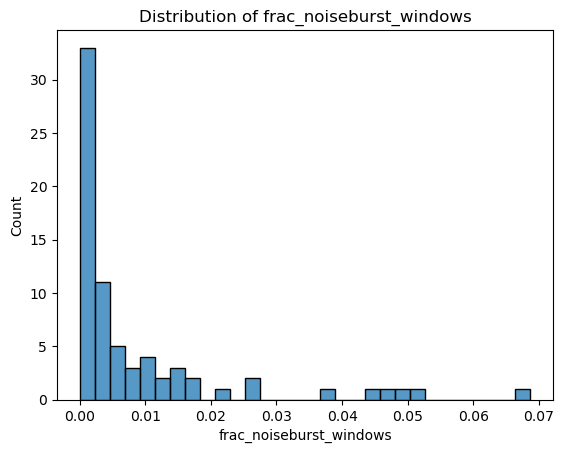


frac_noiseburst_windows percentiles:
0.50    0.003213
0.75    0.010649
0.90    0.025132
0.95    0.045947
Name: frac_noiseburst_windows, dtype: float64


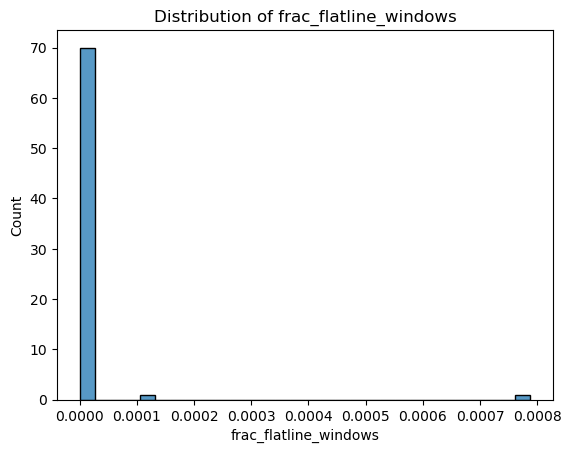


frac_flatline_windows percentiles:
0.50    0.0
0.75    0.0
0.90    0.0
0.95    0.0
Name: frac_flatline_windows, dtype: float64


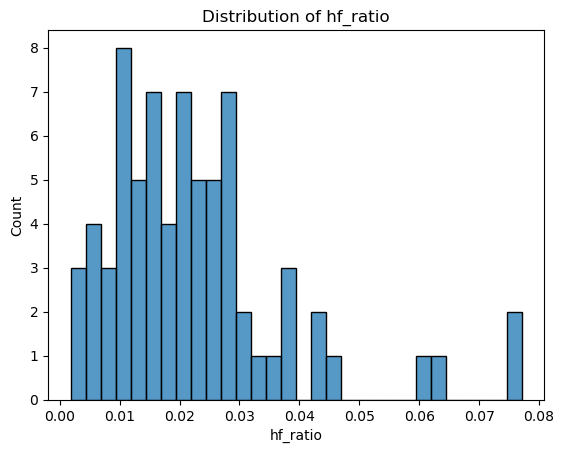


hf_ratio percentiles:
0.50    0.020197
0.75    0.027526
0.90    0.039267
0.95    0.051548
Name: hf_ratio, dtype: float64


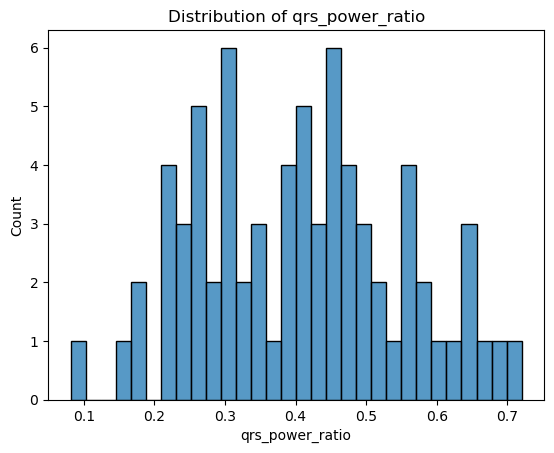


qrs_power_ratio percentiles:
0.50    0.409239
0.75    0.495285
0.90    0.596291
0.95    0.644480
Name: qrs_power_ratio, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Antag df_q er allerede loadet
features = [
    "frac_noiseburst_windows",
    "frac_flatline_windows",
    "hf_ratio",
    "qrs_power_ratio",
]

percentiles = [0.5, 0.75, 0.9, 0.95]

for feat in features:
    fig, ax = plt.subplots()
    sns.histplot(df_q[feat].dropna(), bins=30, ax=ax)
    ax.set_title(f"Distribution of {feat}")
    plt.show()

    print(f"\n{feat} percentiles:")
    print(df_q[feat].quantile(percentiles))


In [18]:
merge_cols = ["patient_id", "recording_id"]

df_all = df_metrics.merge(
    df_q,
    on=merge_cols,
    how="left",
    suffixes=("", "_q"),
)

# Vi fokuserer på NeuroKit, så algoritmeeffekter ikke mudrer billedet
df_nk = df_all[df_all["algo_id"] == "neurokit"].copy()


In [37]:
qual_feats = [
    "frac_noiseburst_windows",
    "frac_flatline_windows",
    "hf_ratio",
    "qrs_power_ratio",
]

for feat in qual_feats:
    label = feat + "_tert"
    s = df_nk[feat].dropna()

    # Hvis der er for få unikke værdier, giver tertiler ingen mening
    if s.nunique() < 3:
        print(f"Skipping tertiles for {feat} (only {s.nunique()} unique values)")
        continue

    df_nk[label] = pd.qcut(
        df_nk[feat],
        3,
        labels=["low", "mid", "high"],
        duplicates="drop",   # håndterer næsten-ens bins
    )

    grp = (
        df_nk
        .groupby(label)[["rr_mae_ms", "rr_rmse_ms", "peak_f1"]]
        .agg(["mean", "median", "count"])
    )
    print(f"\n=== {feat} tertiles vs RR error ===")
    print(grp)



=== frac_noiseburst_windows tertiles vs RR error ===
                             rr_mae_ms                 rr_rmse_ms             \
                                  mean    median count       mean     median   
frac_noiseburst_windows_tert                                                   
low                           1.675262  1.675262     2  14.248257  14.248257   
mid                                NaN       NaN     0        NaN        NaN   
high                          4.049115  4.049115     2  54.638672  54.638672   

                                     peak_f1                  
                             count      mean    median count  
frac_noiseburst_windows_tert                                  
low                              2  0.499552  0.499552     2  
mid                              0       NaN       NaN     0  
high                             2  0.995845  0.995845     2  
Skipping tertiles for frac_flatline_windows (only 2 unique values)

=== hf_ratio tertil

C:\Users\kvjkv\AppData\Local\Temp\ipykernel_28168\4152702973.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(label)[["rr_mae_ms", "rr_rmse_ms", "peak_f1"]]
C:\Users\kvjkv\AppData\Local\Temp\ipykernel_28168\4152702973.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(label)[["rr_mae_ms", "rr_rmse_ms", "peak_f1"]]
C:\Users\kvjkv\AppData\Local\Temp\ipykernel_28168\4152702973.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

In [38]:
df_nk["any_flatline"] = df_nk["frac_flatline_windows"] > 0

grp_flat = (
    df_nk
    .groupby("any_flatline")[["rr_mae_ms", "rr_rmse_ms", "peak_f1"]]
    .agg(["mean", "median", "count"])
)

print(grp_flat)


             rr_mae_ms                 rr_rmse_ms                    peak_f1  \
                  mean    median count       mean     median count      mean   
any_flatline                                                                   
False         3.241728  2.022334     3  41.034539  25.807871     3  0.996923   
True          1.723571  1.723571     1  14.670238  14.670238     1  0.000024   

                              
                median count  
any_flatline                  
False         0.998168     3  
True          0.000024     1  


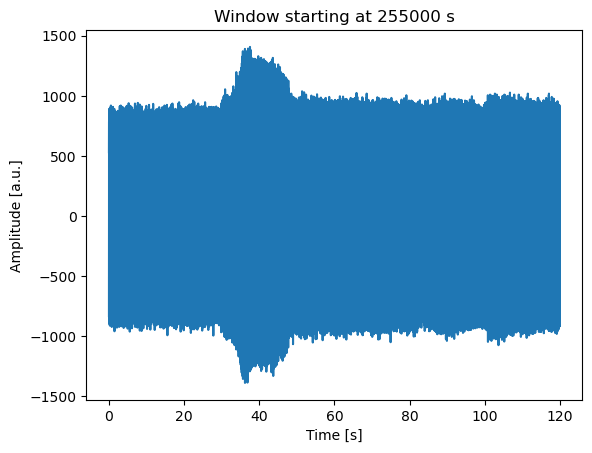

255950.5

In [ ]:
import numpy as np
from src.hrv_epatch.io.tdms import load_tdms_from_path

# Du skal selv hente signal og fs (sampling frequency) for f.eks. Patient 29, recording 1
# pseudo:
sig, meta = load_tdms_from_path(df_rec[(df_rec["patient_id"] == 29) & (df_rec["recording_id"] == 1)]["tdms_path"].iloc[0])
fs = meta.fs

def plot_window(sig, fs, start_s, duration_s=10):
    start_idx = int(start_s * fs)
    end_idx = start_idx + int(duration_s * fs)
    t = np.arange(end_idx - start_idx) / fs
    plt.figure()
    plt.plot(t, sig[start_idx:end_idx])
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude [a.u.]")
    plt.title(f"Window starting at {start_s} s")
    plt.show()



plot_window(sig, fs, start_s=255000, duration_s=120)

meta.n_samples/fs

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def compute_window_metrics(sig, fs, win_s=10):
    win_n = int(win_s * fs)
    n_win = len(sig) // win_n
    rows = []

    for i in range(n_win):
        x = sig[i*win_n : (i+1)*win_n]
        if len(x) < win_n:
            break

        std = np.std(x)
        rng = x.max() - x.min()

        # Spektral info (meget simpel FFT-baseret)
        freqs = np.fft.rfftfreq(win_n, d=1/fs)
        psd = np.abs(np.fft.rfft(x))**2

        total_power = psd.sum()
        band_hf = psd[(freqs >= 40) & (freqs <= 100)].sum()
        band_qrs = psd[(freqs >= 5) & (freqs <= 25)].sum()

        hf_ratio = band_hf / total_power if total_power > 0 else 0.0
        qrs_ratio = band_qrs / total_power if total_power > 0 else 0.0

        rows.append({
            "win_idx": i,
            "start_s": i * win_s,
            "std": std,
            "range": rng,
            "hf_ratio_win": hf_ratio,
            "qrs_ratio_win": qrs_ratio,
        })

    return pd.DataFrame(rows)


def plot_window(sig, fs, start_s, duration_s=10, title="Window"):
    start = int(start_s * fs)
    end = start + int(duration_s * fs)
    t = np.arange(end - start) / fs

    plt.figure()
    plt.plot(t, sig[start:end])
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude [a.u.]")
    plt.title(title)
    plt.show()


High noiseburst: window 24812.0 starting at 248120.0 s


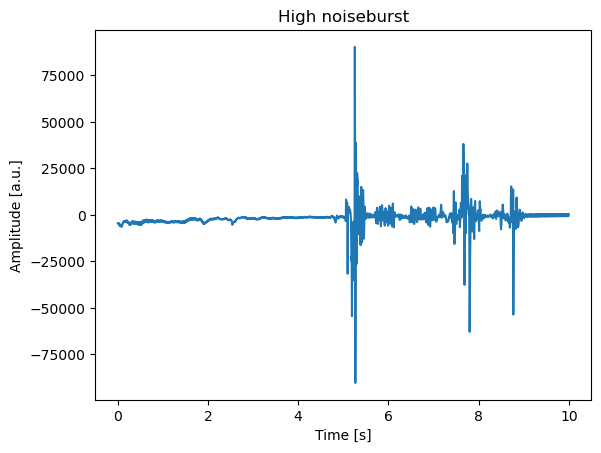

High HF ratio: window 25469.0 starting at 254690.0 s


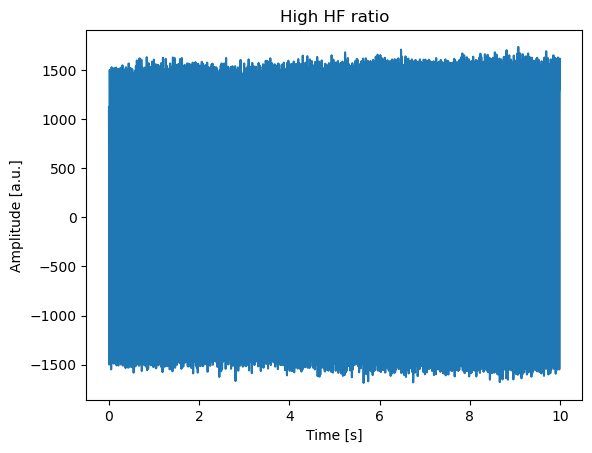

Low-variance / flatline: window 1868.0 starting at 18680.0 s


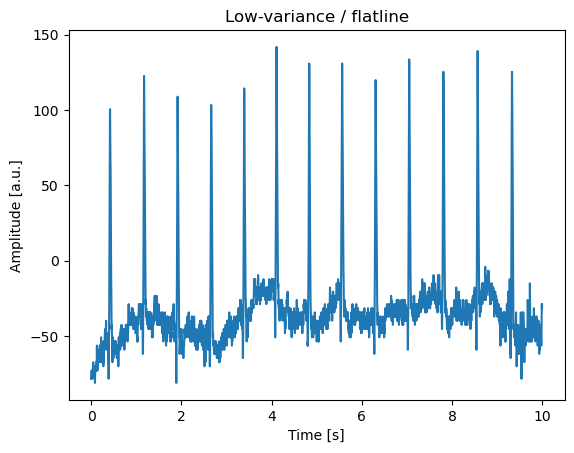

Baseline-like: window 14068.0 starting at 140680.0 s


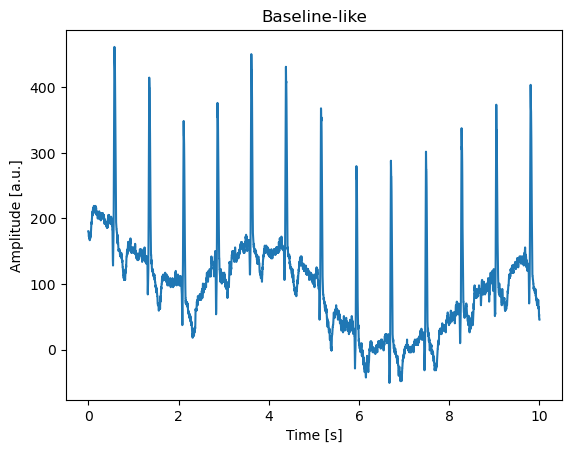

In [41]:
row_29 = df_nk[(df_nk["patient_id"] == 29) & (df_nk["recording_id"] == 1)].iloc[0]
sig, meta = load_tdms_from_path(row_29["raw_tdms_path"])
fs = meta.fs

df_win = compute_window_metrics(sig, fs, win_s=10)

# 1) Vælg vindue med højeste range (= noiseburst)
w_noise = df_win.sort_values("range", ascending=False).iloc[0]

# 2) Vælg vindue med højeste hf_ratio_win
w_hf = df_win.sort_values("hf_ratio_win", ascending=False).iloc[0]

# 3) Vælg vindue med laveste std (= flatline-ish)
w_flat = df_win.sort_values("std", ascending=True).iloc[0]

# 4) Vælg "pænt" baseline-vindue (median std)
w_baseline = df_win.iloc[(df_win["std"] - df_win["std"].median()).abs().argmin()]

for label, w in [
    ("High noiseburst", w_noise),
    ("High HF ratio", w_hf),
    ("Low-variance / flatline", w_flat),
    ("Baseline-like", w_baseline),
]:
    print(f"{label}: window {w['win_idx']} starting at {w['start_s']} s")
    plot_window(sig, fs, start_s=w["start_s"], duration_s=10, title=label)
